In [13]:
'''
1. pickle file load
2. 텍스트 전처리
3. word count
'''

import pickle
import os
# 1. pickle file load
file = open("../data/news_crawling.pickle", mode = "rb")
news_crawling = pickle.load(file) # list
print(type(news_crawling))
print(news_crawling)

<class 'list'>
["'불붙는' 여 원내대표 경선..후보 교통정리 주목", "다음 달 7일 '180석 여당' 첫 원내대표 뽑는다..경선준비 착수", '親文 치고나가는 巨與 원내대표 경선.. 초선 68명 票心 변수', '홍남기 부총리 "긴급재난지원금 70% 지급 설득..재정 효율적으로 써야"', '홍남기 "무조건 재정 아끼자는 것 아냐.. 국회에 재난지원금 70% 설득할 것"', '홍남기 "재난지원금 70% 국회 설득, 재정여력 더 축적해야"', '초 1~3학년까지 540만 온라인개학..접속 불안했지만 대란 없었다', '\'540만 온라인 개학\' EBS·e학습터 "잠깐 문제 외 대란 없었다"', '3차 온라인 개학..플랫폼 안정에도 곳곳 접속장애', "캐나다 최악 총기난사 최소 16명 사망..'경찰 위장' 용의자 사살", '캐나다서 총기난사 최소 16명 사망..경찰도 1명 숨져', '캐나다 시골마을서 총기난사로 경찰 포함 13명 사망', '스웨덴 집단면역의 대가는 노인희생..보건정책 실패론 득세', "방통위, TV조선 3년,  채널A 4년 '조건부 재승인'", '고양시, 日서 입국 40대 여성 코로나19 확진', '"러시아, 신형 전차 \'아르마타\' 시리아서 실전시험..내년 양산"', '자금난 겪는 대한항공, 대규모 유상증자 추진', "위성교섭단체, 21대 원구성 '변수'..민주, 운영·법사 가져올까", '코로나에 회식금지인데..육군 장교 술 먹고 민간인 성추행까지', "여, 재난지원금 '전국민 지급' 고수..액수 줄여 추진 가능성도", '싱가포르, 코로나 신규확진 1천426명..누적환자도 8천14명', '코로나 범죄 500건 넘었다.. 격리거부·허위신고 주말새 10건↑', '발등에 불 떨어진 통합당..재난지원금 논의는 실종', '코로나19 지형 또 변화..선진국 진정되자 신흥국에 급속확산', "'코로나19' 바이러스", '만리재사진첩', '포토친구', '더불어민주당', 'None', 'None', 'None', 'None', 'None', 'Non

In [14]:
# 2. 텍스트 전처리
def clean_text(texts):
    from re import sub  # gsub() 유사함

    # 1. 소문자 변경
    texts_re = texts.lower() # 문장 1개 소문자 변경

    # 2. 숫자 제거(불용어 제거 (1))
    texts_re2 = sub("[0-9]", "", texts_re)

    # 3. 문장부호 제거(불용어 제거 (2))
    punc_str = "[.,;:!?]"
    texts_re3 = sub(punc_str, "", texts_re2)

    # 4. 문장부호 제거(불용어 제거 (3))
    spec_str = "[!@#$%^&*()]"
    texts_re4 = sub(spec_str, "", texts_re3)

    # 5. 공백(white space) 제거(불용어 제거 (4)) : 'abtta a' -> ''.join('abtta', 'a') -> 'abttaa'
    texts_re5 = " ".join(texts_re4.split())

    return texts_re5

try:
    clean_news = [clean_text(news) for news in news_crawling]
except Exception as e:
    print("예외 발생 :", e)
finally:
    print(clean_news)

["'불붙는' 여 원내대표 경선후보 교통정리 주목", "다음 달 일 '석 여당' 첫 원내대표 뽑는다경선준비 착수", '親文 치고나가는 巨與 원내대표 경선 초선 명 票心 변수', '홍남기 부총리 "긴급재난지원금 지급 설득재정 효율적으로 써야"', '홍남기 "무조건 재정 아끼자는 것 아냐 국회에 재난지원금 설득할 것"', '홍남기 "재난지원금 국회 설득 재정여력 더 축적해야"', '초 ~학년까지 만 온라인개학접속 불안했지만 대란 없었다', '\'만 온라인 개학\' ebs·e학습터 "잠깐 문제 외 대란 없었다"', '차 온라인 개학플랫폼 안정에도 곳곳 접속장애', "캐나다 최악 총기난사 최소 명 사망'경찰 위장' 용의자 사살", '캐나다서 총기난사 최소 명 사망경찰도 명 숨져', '캐나다 시골마을서 총기난사로 경찰 포함 명 사망', '스웨덴 집단면역의 대가는 노인희생보건정책 실패론 득세', "방통위 tv조선 년 채널a 년 '조건부 재승인'", '고양시 日서 입국 대 여성 코로나 확진', '"러시아 신형 전차 \'아르마타\' 시리아서 실전시험내년 양산"', '자금난 겪는 대한항공 대규모 유상증자 추진', "위성교섭단체 대 원구성 '변수'민주 운영·법사 가져올까", '코로나에 회식금지인데육군 장교 술 먹고 민간인 성추행까지', "여 재난지원금 '전국민 지급' 고수액수 줄여 추진 가능성도", '싱가포르 코로나 신규확진 천명누적환자도 천명', '코로나 범죄 건 넘었다 격리거부·허위신고 주말새 건↑', '발등에 불 떨어진 통합당재난지원금 논의는 실종', '코로나 지형 또 변화선진국 진정되자 신흥국에 급속확산', "'코로나' 바이러스", '만리재사진첩', '포토친구', '더불어민주당', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', '부산 ·번 확진 부녀 접촉자만 명 넘어', "전세계 만명 중국에 천조 '코로나 배상' 소송 제기", "월일 이후 '순차적 등교 개학'할 듯대입 앞둔 

In [ ]:
# 3. word count
word_count = {} # 빈 set
for text in clean_news:
    for word in text.split():
        word_count[word] = word_count.get(word, 0) + 1
        
print(word_count)

word_count2 = word_count.copy() # 객체 복제

# 2음절 이상 단어 선택
for word in word_count.keys():
    if len(word) < 2:
        del word_count2[word]

print(word_count2)

top10
[('코로나', 5), ('원내대표', 3), ('홍남기', 3), ('온라인', 3), ('확진', 3), ('재난지원금', 2), ('대란', 2), ('캐나다', 2), ('총기난사', 2), ('최소', 2)]
    word  count
0    코로나      5
1   원내대표      3
2    홍남기      3
3    온라인      3
4     확진      3
5  재난지원금      2
6     대란      2
7    캐나다      2
8   총기난사      2
9     최소      2


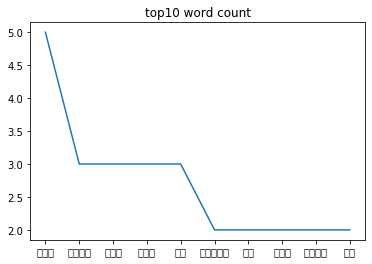

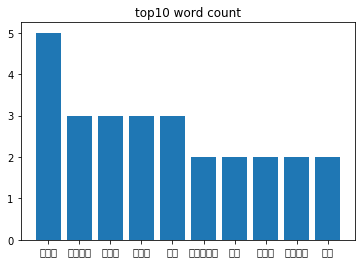

In [23]:
# 5. top10, top5
from collections import Counter
count = Counter(word_count2)

del count["none"]
del count["[바로잡습니다]"]

top10 = count.most_common(10)
print("top10")
print(top10)

# list[(), ()]
import pandas as pd
top10_df = pd.DataFrame(top10, columns = ["word", "count"])
print(top10_df)

import matplotlib.pyplot as plt

# 선 그래프
plt.plot(top10_df["word"], top10_df["count"]) # x, y
plt.title("top10 word count")
plt.show()

# 막대 그래프
plt.bar(top10_df["word"], top10_df["count"]) # x, y
plt.title("top10 word count")
plt.show()